# Распределение Лапласа

Подключаем необходимые модули

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

Сгенерируем выборку объёма 1000 для распределения Лапласа (с $\alpha=1$ и $\beta=0$):

In [12]:
a = 1
b = 0
a, b

(1, 0)

In [13]:
sample = sts.laplace.rvs(loc = b, scale = a, size=1000)

Построим гистограмму выборки и нарисуем поверх неё теоретическую плотность распределения

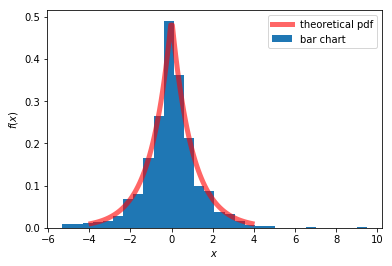

In [14]:
# гистограмма
plt.hist(sample,bins = 30,normed=True, label='bar chart')
plt.ylabel('fraction of samples')
plt.xlabel('$x$');

# теоретическая плотность распределения
x = np.linspace(sts.laplace.ppf(0.01), sts.laplace.ppf(0.99), 100)
plt.plot(x, sts.laplace.pdf(x), 'r-', lw=5, alpha=0.6, label='theoretical pdf')



plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$');

Формируем массивы распределений выборочных средних

Математическое ожидание для распределения Лапласа - $\beta$, дисперсия $\frac{2}{\alpha^2}$ ($\alpha=1$ и $\beta=0$)

In [15]:
mu = b
sigma = 2.0/pow(a,2)
(mu, sigma)

(0, 2.0)

Оценим распределение выборочного среднего нашей случайной величины при объёмах выборок 5, 10 и 50

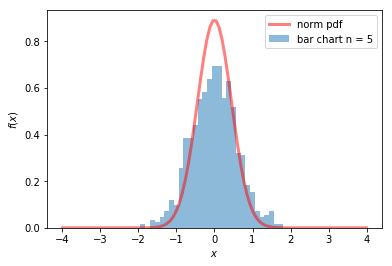

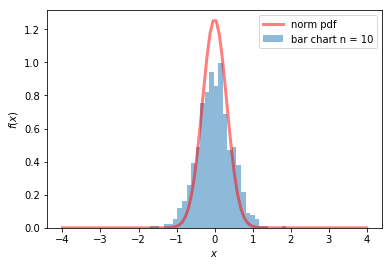

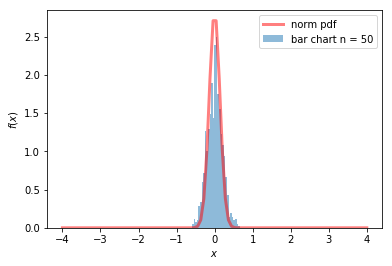

In [24]:
for n in [5,10,50]:
    # Формируем массив выборочных средних
    ch = [np.mean(sts.laplace.rvs(loc = 0, scale = 1, size = n)) for i in range(1000)] 
    
    # Строим диаграмму выборочных средних
    plt.hist(ch,bins = 30,normed=True, label = 'bar chart n = ' + str(n), alpha=0.5) 

    # Строим график нормального распределения
    norm_rv = sts.norm(b, np.sqrt(a/float(n))) 
    x = np.linspace(-4,4,100)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label='norm pdf', alpha=0.5, lw=3, c="red")
    
    # Выводим график
    plt.legend()
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.show();

# Вывод

С ростом объема выборки n точность апроксимации нормальным распределением увеличивается, что подтверждает ЦПТ.